In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm, skew, shapiro
from scipy import stats
from scipy.stats import kstest

pd.set_option('display.max_columns', 100) 

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.duplicated().sum()

0

In [5]:
print(df.shape)

(2000, 21)


# Check if there is any missing values and duplicate values

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Is the target balance?

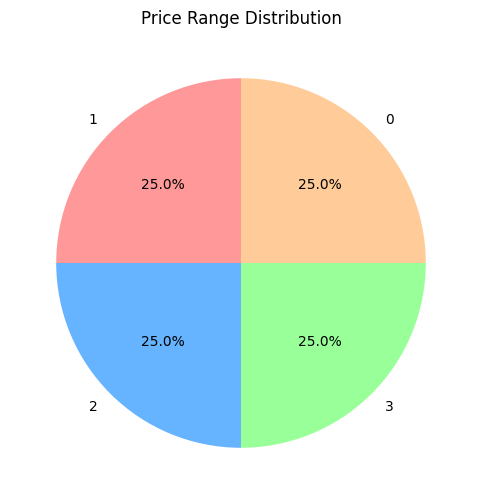

In [9]:
v = df['price_range'].value_counts()
plt.figure(figsize = (10,6))

plt.pie(v, labels= v.index, autopct = '%1.1f%%', startangle = 90, colors=['#ff9999','#66b3ff','#99ff99', '#ffcc99'])
plt.title('Price Range Distribution')
plt.show()

## PCA Before

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df.drop(columns = 'price_range')
target = df['price_range']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca_before = PCA(n_components=2)
X_pca_before = pca_before.fit_transform(X_scaled)

In [11]:
pca_df_before = pd.DataFrame(data=X_pca_before, columns=['PC1', 'PC2'])
pca_df_before['target'] = target
target_names = [0,1,2,3]

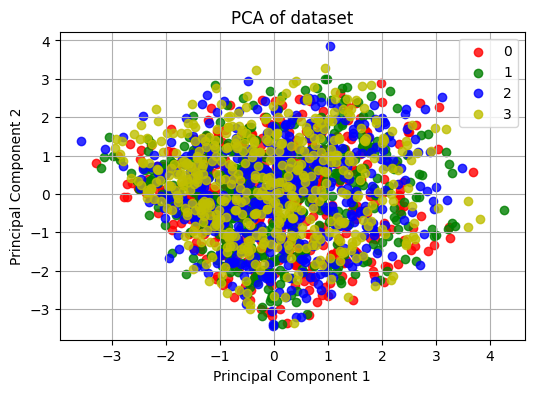

In [12]:
plt.figure(figsize=(6, 4))
for target, color in zip([0, 1, 2, 3], ['r', 'g', 'b', 'y']):  # Adjust this for your classes
    indices = pca_df_before['target'] == target
    plt.scatter(pca_df_before.loc[indices, 'PC1'], pca_df_before.loc[indices, 'PC2'], c=color, label=target_names[target], alpha=0.8)

plt.title('PCA of dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [13]:
explained_variance = pca_before.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')

# Total variance explained by the first two components
total_explained_variance = explained_variance.sum()
print(f'Total variance explained by the first 2 components: {total_explained_variance:.2f}')

Explained variance ratio: [0.08385933 0.08101965]
Total variance explained by the first 2 components: 0.16


# Univariate Analysis

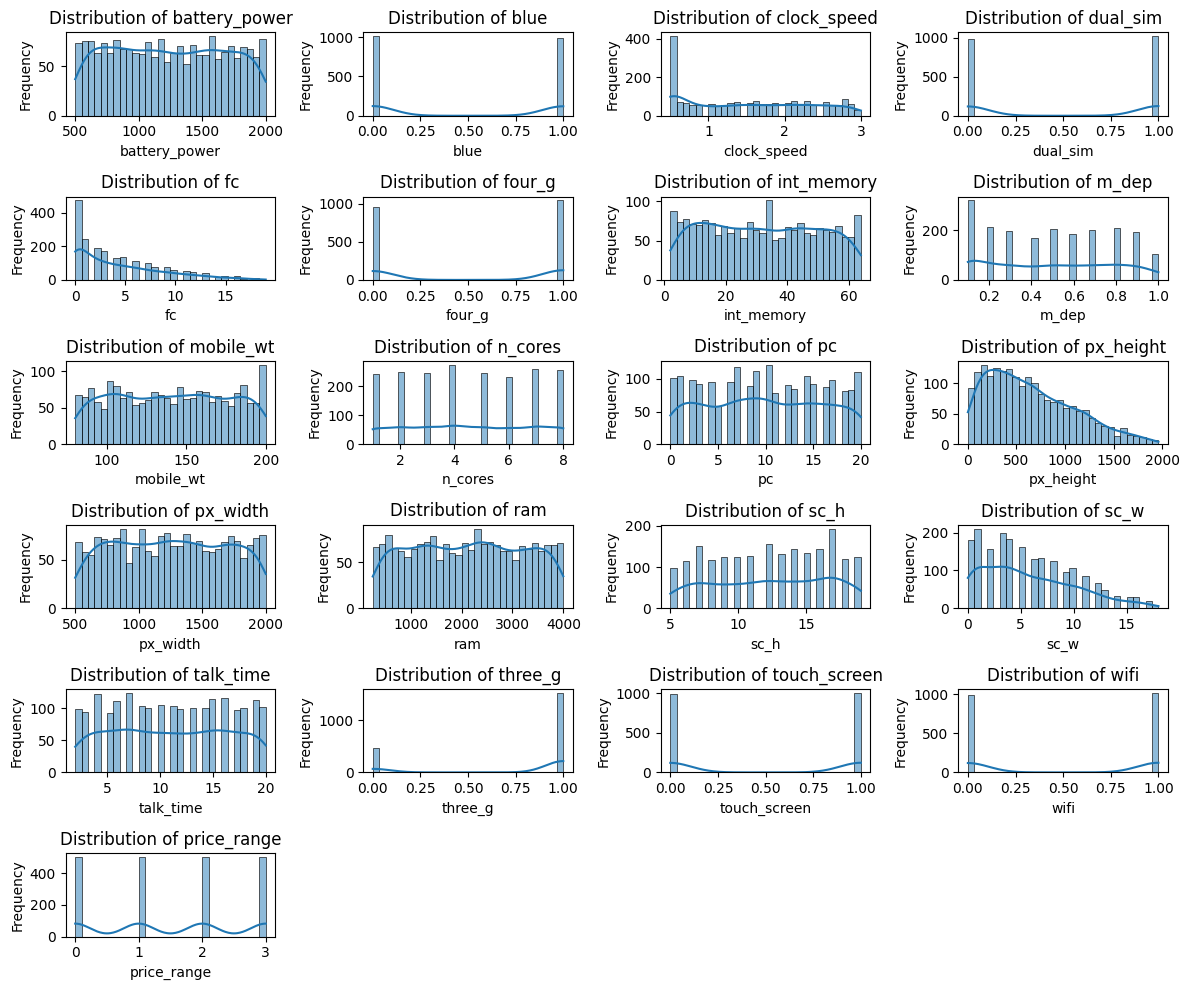

In [14]:
plt.figure(figsize=(12, 10))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(6, 4, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [15]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [16]:
numerical = ['battery_power', 'clock_speed', 'fc', 
       'int_memory',  'mobile_wt',  'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 
        ]
cat = ['blue','dual_sim','four_g','m_dep','n_cores', 'three_g',
       'touch_screen', 'wifi', 'price_range']

In [17]:
skewness_val = {col: skew(df[col]) for col in numerical}
skewness_df = pd.DataFrame(list(skewness_val.items()), columns=['Feature', 'Skewness']).sort_values(by = 'Skewness', ascending = False)
skewness_df

,Feature,Skewness
2,fc,1.019046
6,px_height,0.665771
10,sc_w,0.633312
1,clock_speed,0.177951
3,int_memory,0.057846
0,battery_power,0.031875
5,pc,0.017293
7,px_width,0.014776
11,talk_time,0.009505
8,ram,0.006623


In [18]:
from scipy.stats import boxcox

df['px_height'] += 1  
transformed_data, lambda_ = boxcox(df['px_height'])
df['px_height'] = transformed_data

df['fc'] += 1  
transformed_data, lambda_ = boxcox(df['fc'])
df['fc'] = transformed_data

df['sc_w'] += 1  
transformed_data, lambda_ = boxcox(df['sc_w'])
df['sc_w'] = transformed_data

df['clock_speed'] += 1  
transformed_data, lambda_ = boxcox(df['clock_speed'])
df['clock_speed'] = transformed_data

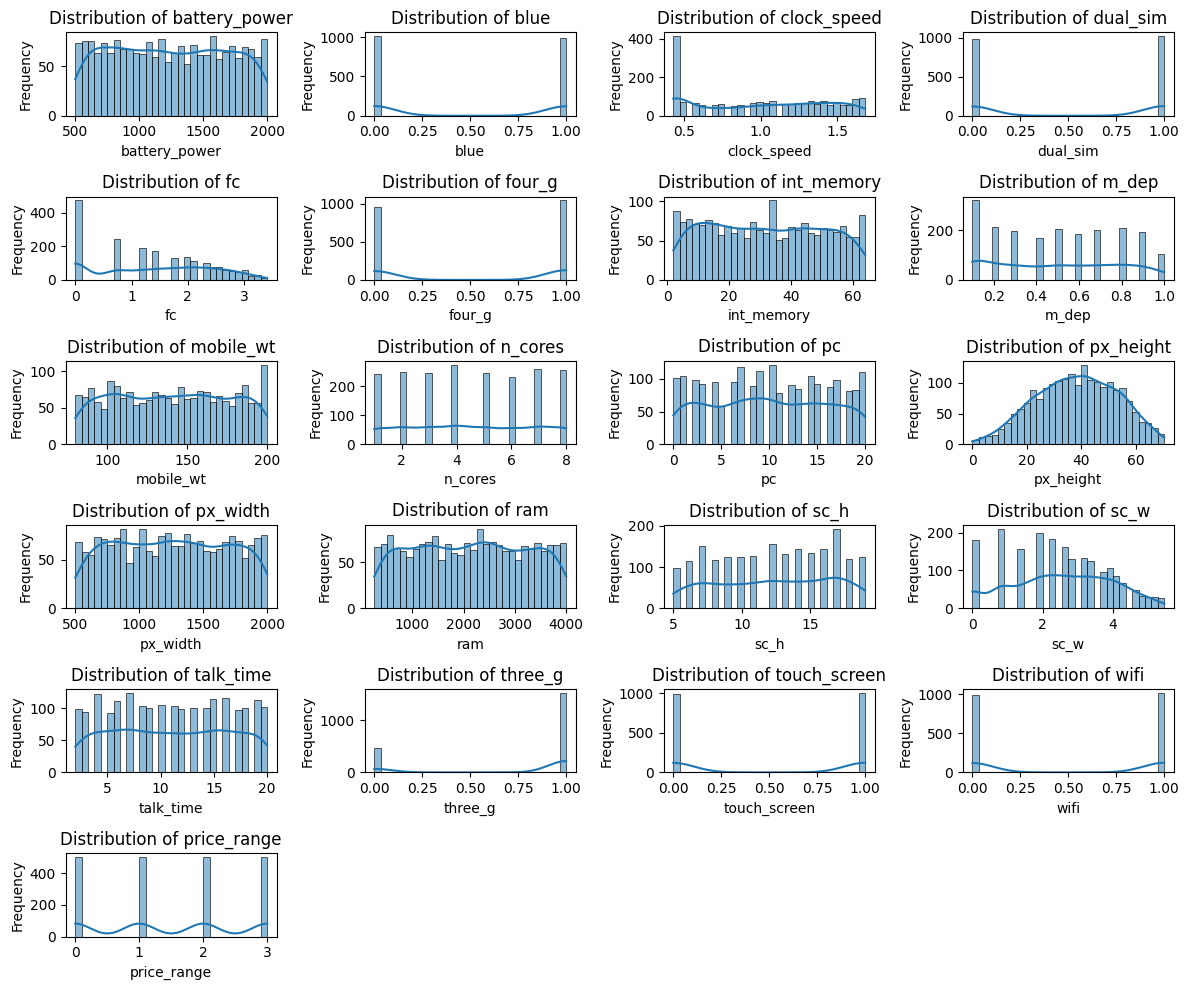

In [19]:
plt.figure(figsize=(12, 10))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(6, 4, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
skewness_val = {col: skew(df[col]) for col in numerical}
skewness_df = pd.DataFrame(list(skewness_val.items()), columns=['Feature', 'Skewness']).sort_values(by = 'Skewness', ascending = False)
skewness_df

,Feature,Skewness
3,int_memory,0.057846
0,battery_power,0.031875
5,pc,0.017293
7,px_width,0.014776
11,talk_time,0.009505
8,ram,0.006623
4,mobile_wt,0.006553
2,fc,-0.032142
1,clock_speed,-0.042831
10,sc_w,-0.093860


In [21]:
numerical = ['battery_power', 'clock_speed', 'fc', 
       'int_memory',  'mobile_wt',  'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 
        ]
cat = ['blue','dual_sim','four_g','m_dep','n_cores', 'three_g',
       'touch_screen', 'wifi', 'price_range']

# Bivariate/ Multivarite Analysis

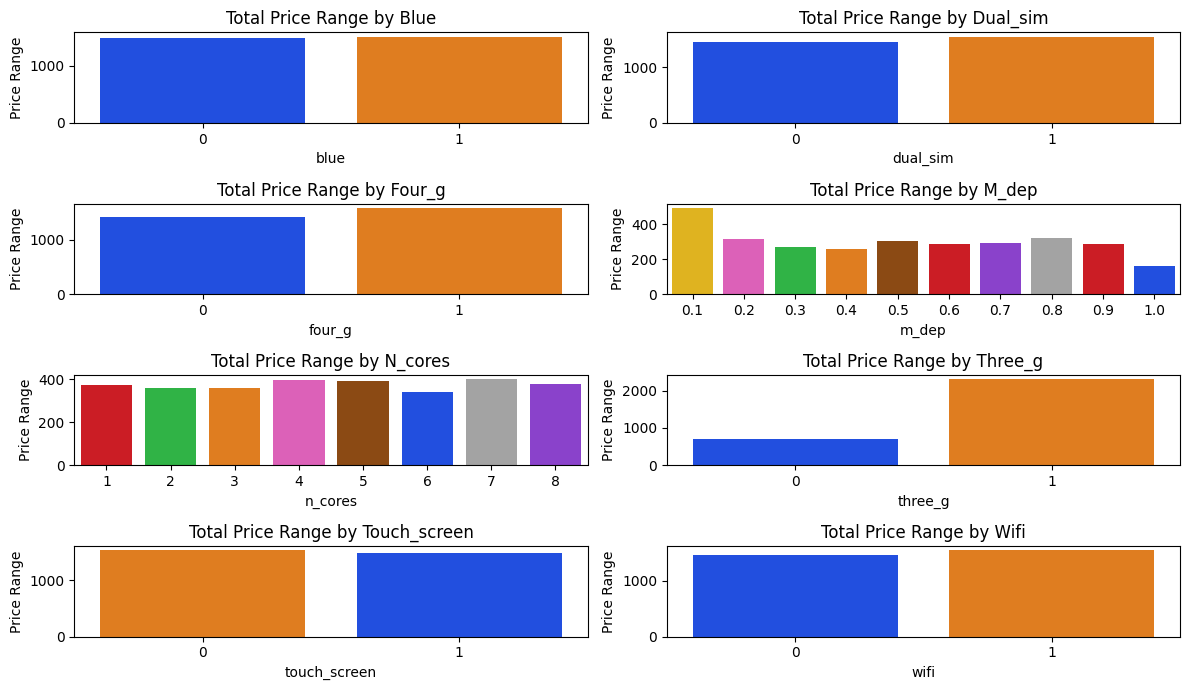

In [22]:
cat_features = ['blue', 'dual_sim', 'four_g', 'm_dep', 'n_cores', 'three_g','touch_screen', 'wifi']
fig, axes = plt.subplots(4, 2, figsize=(12, 7))

for i, feature in enumerate(cat_features):
    # Group by the categorical feature and calculate the mean price_range
    feature_df = df.groupby(feature)['price_range'].sum().reset_index()
    feature_df = feature_df.sort_values(by='price_range', ascending=False)

    # Plotting
    ax = axes[i // 2, i % 2]  # Determine the position of the subplot
    sns.barplot(y='price_range', x=feature, data=feature_df, palette='bright', ax=ax, hue ='price_range', legend = False )
    ax.set_xlabel(feature)
    ax.set_ylabel('Price Range')
    ax.set_title(f'Total Price Range by {feature.capitalize()}')

plt.tight_layout()
plt.show()

## Correlation map

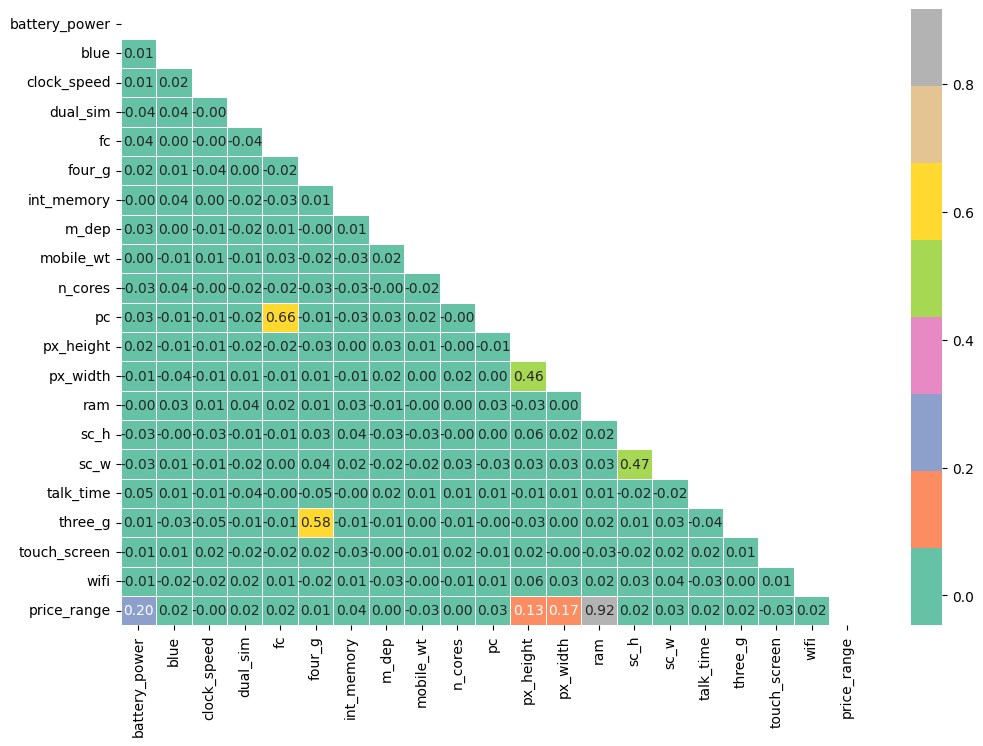

In [24]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Set2')
plt.show()

RAM has the highest correlation with the price range at 0.92, followed by battery power with a correlation of 0.2. The feature with the least correlation is m_dep and clock speed has a correlation of less than |0.01|.

## Ram vs Price Range

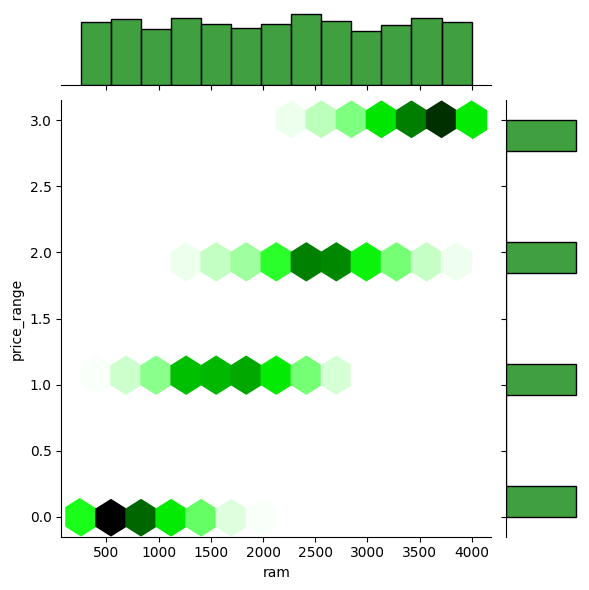

In [25]:
sns.jointplot(x='ram',y='price_range',data=df, kind = "hex", color= 'green')
plt.show() 

## Battery vs Price Range Vs Wifi

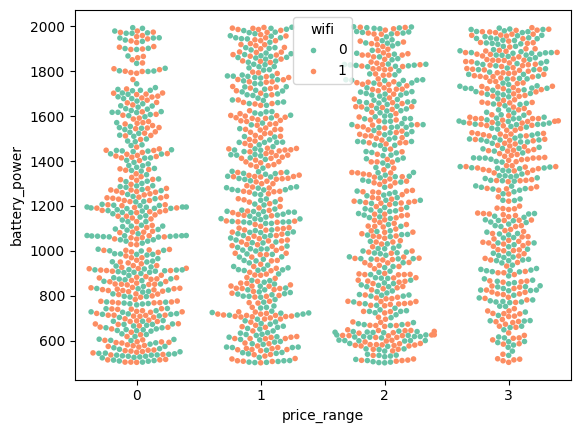

In [26]:
sns.swarmplot(y='battery_power',x='price_range',data=df, hue = 'wifi', size = 4, palette="Set2")
plt.show() 

## Px Height vs Px Width vs Price Range

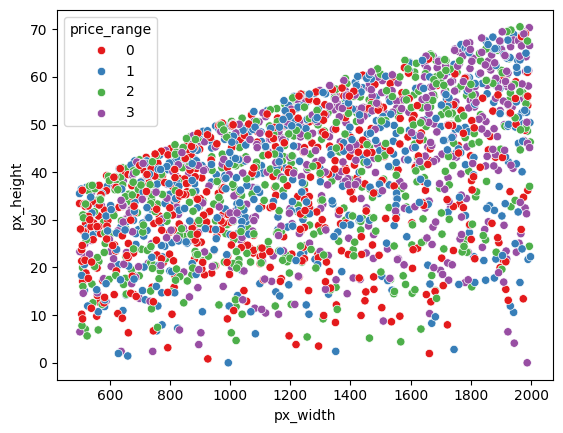

In [27]:
sns.scatterplot(y='px_height',x='px_width', hue = 'price_range', data=df, palette="Set1")
plt.show() 

## 3G vs 4G

<Axes: ylabel='three_g'>

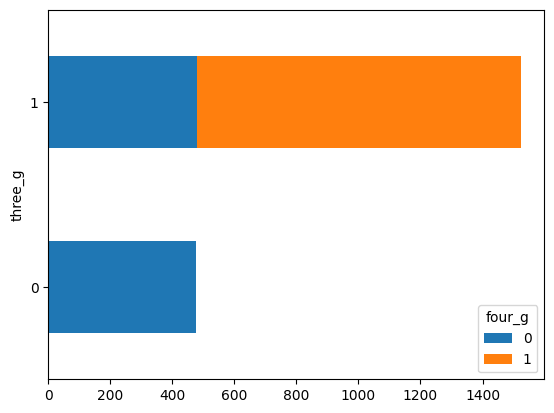

In [28]:
pd.crosstab(df['three_g'], df['four_g']).plot(kind='barh', stacked=True)


If there is no 3G 100% there is no 4G.

# Feature selection

In [29]:
numerical = ['battery_power', 'clock_speed', 'fc', 
       'int_memory',  'mobile_wt',  'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'
        ]
cat = ['blue','dual_sim','four_g','m_dep','n_cores', 'three_g',
       'touch_screen', 'wifi']

## Anova - Numerical Features

In [30]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

selector = SelectKBest(f_classif, k=12)
X_anova  = selector.fit_transform(df[numerical], df['price_range'])

anova_scores = selector.scores_
p_values = selector.pvalues_

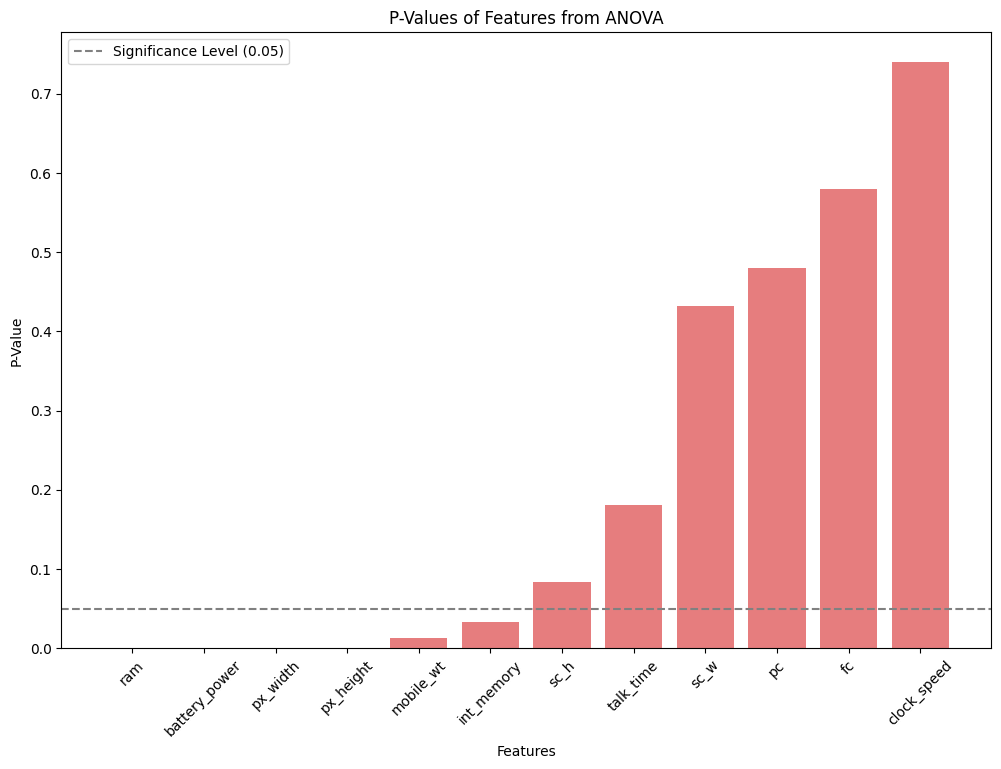

In [31]:
results_df = pd.DataFrame({
    'Feature': numerical,
    'P-Value': p_values,
    'Scores' :anova_scores
})


results_df.sort_values(by='P-Value', ascending=True, inplace=True)

plt.figure(figsize=(12, 8))
plt.bar(results_df['Feature'], results_df['P-Value'], color='tab:red', alpha=0.6)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('P-Value')
plt.title('P-Values of Features from ANOVA')
plt.axhline(y=0.05, color='gray', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

In [32]:
num_features = list(results_df[results_df['P-Value'] <= 0.05]['Feature'])
num_features

['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'int_memory']

## Chi-sq - Catergorical Features

In [33]:

X = df[cat]
y = df['price_range']

chi_scores = chi2(X,y)
chi_scores[1]

array([0.86772634, 0.88929789, 0.67730046, 0.86237738, 0.02802156,
       0.95474847, 0.5873935 , 0.9356422 ])

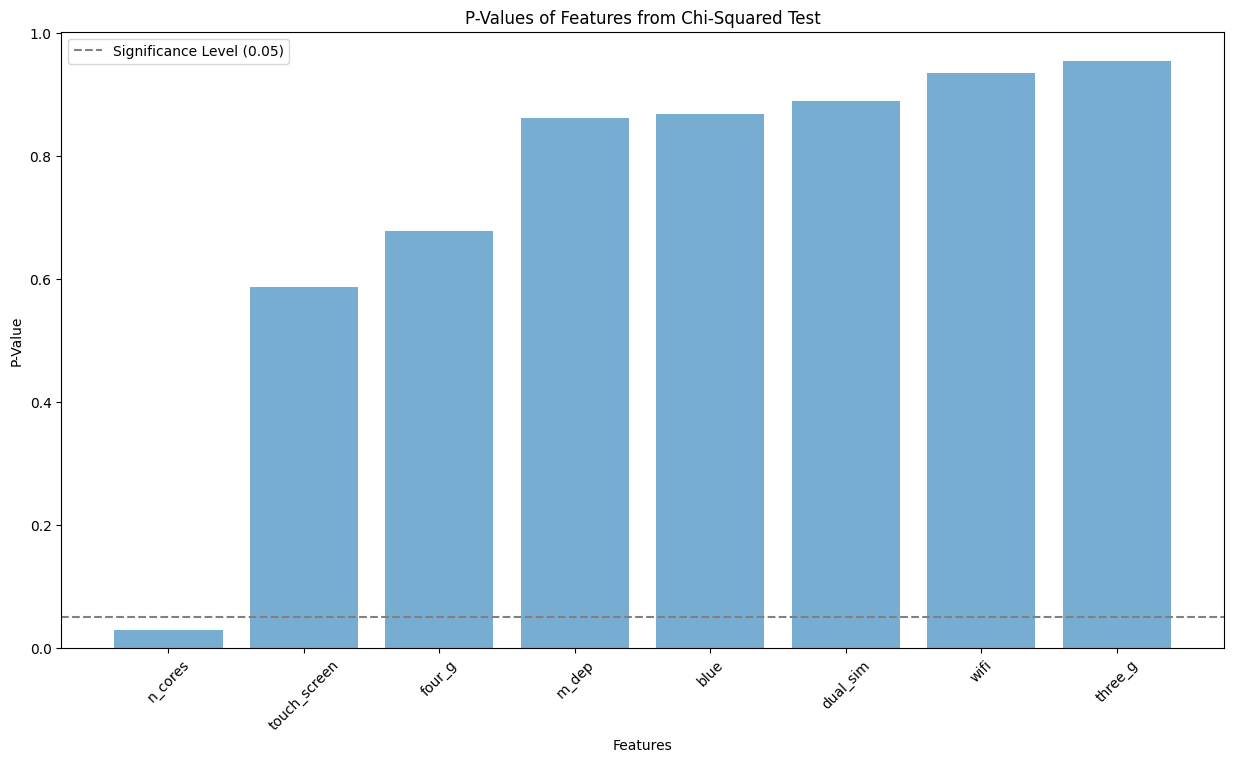

In [34]:
#p_values = pd.Series(chi_scores[1], index=X.columns)
cat_df = pd.DataFrame({
    'Feature': cat,
    'P-Value': chi_scores[1],
})
# Sort p-values in ascending order
cat_df.sort_values(by='P-Value', ascending=True, inplace=True)

# Plotting the P-Values
plt.figure(figsize=(15, 8))
plt.bar(cat_df['Feature'], cat_df['P-Value'], color='tab:blue', alpha=0.6)
plt.xlabel('Features')
plt.ylabel('P-Value')
plt.title('P-Values of Features from Chi-Squared Test')
plt.axhline(y=0.05, color='gray', linestyle='--', label='Significance Level (0.05)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

In [35]:
cat_features = list(cat_df[cat_df['P-Value'] <= 0.05]['Feature'])
cat_features

['n_cores']

## PCA Before and After

In [36]:
X = pd.concat([df[num_features],df[cat_features]], axis=1)
y = df['price_range']
print(X)

       ram  battery_power  px_width  px_height  mobile_wt  int_memory  n_cores
0     2549            842       756   6.696685        188           7        2
1     2631           1021      1988  48.629489        136          53        3
2     2603            563      1716  57.116252        145          41        5
3     2769            615      1786  56.083096        131          10        6
4     1411           1821      1212  55.905122        141          44        2
...    ...            ...       ...        ...        ...         ...      ...
1995   668            794      1890  56.216165        106           2        6
1996  2032           1965      1965  48.888851        187          39        4
1997  3057           1911      1632  47.656262        108          36        8
1998   869           1512       670  29.938332        145          46        5
1999  3919            510       754  35.809124        168          45        6

[2000 rows x 7 columns]


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_after = PCA(n_components=2)
X_pca_after = pca_after.fit_transform(X_scaled)

In [39]:
pca_df_after = pd.DataFrame(data=X_pca_after, columns=['PC1', 'PC2'])
pca_df_after['target'] = y
target_names = [0,1,2,3]

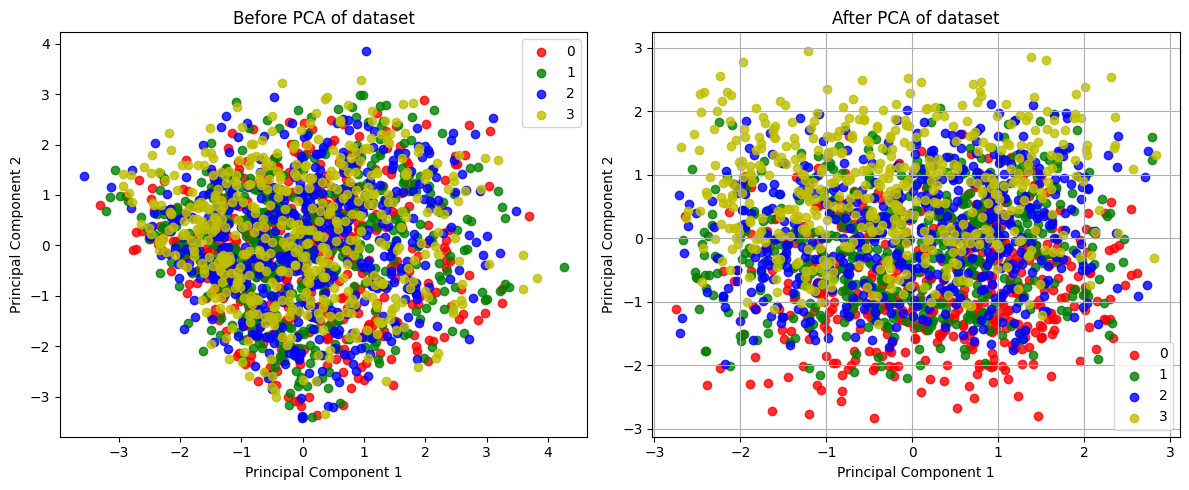

In [40]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for target, color in zip([0, 1, 2, 3], ['r', 'g', 'b', 'y']):  # Adjust this for your classes
    indices = pca_df_before['target'] == target
    plt.scatter(pca_df_before.loc[indices, 'PC1'], pca_df_before.loc[indices, 'PC2'], c=color, label=target_names[target], alpha=0.8)

plt.title('Before PCA of dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()


plt.subplot(1, 2, 2)
for target, color in zip([0, 1, 2, 3], ['r', 'g', 'b', 'y']):  # Adjust this for your classes
    indices = pca_df_after['target'] ==target
    plt.scatter(pca_df_after.loc[indices, 'PC1'], pca_df_after.loc[indices, 'PC2'], c=color, label=target_names[target], alpha=0.8)

plt.title('After PCA of dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [41]:
explained_variance = pca_after.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')

# Total variance explained by the first two components
total_explained_variance = explained_variance.sum()
print(f'Total variance explained by the first 2 components: {total_explained_variance:.2f}')

Explained variance ratio: [0.20892939 0.14991757]
Total variance explained by the first 2 components: 0.36


# Transformation & Machine Learning

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [43]:
random_state=42

scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]

svc_model = SVC(random_state = random_state) 
gbc_model = GradientBoostingClassifier(random_state = random_state)
rf_model = RandomForestClassifier(random_state = random_state)
knn_model = KNeighborsClassifier()
xgb_model = XGBClassifier(random_state = random_state)
lgb_model = LGBMClassifier(random_state = random_state, verbose= -1)
cat_model = CatBoostClassifier(random_state = random_state, logging_level='Silent')

models = ('SVM', svc_model), ('GB', gbc_model), ('RF', rf_model), ('KNN', knn_model), ('XGB', xgb_model), ('LGB', lgb_model), ('CAT', cat_model)

In [44]:
results = []

def evaluate_model(scaler, model):
    transformer = ColumnTransformer(transformers=[('num', scaler, num_features), ('cat', OneHotEncoder(), cat_features)])
    pipeline = Pipeline([('preprocessor', transformer), ('model', model)])

    ave_precision = np.mean(cross_val_score(pipeline, X, y, cv=5, scoring='precision_weighted'))
    ave_recall = np.mean(cross_val_score(pipeline, X, y, cv=5, scoring='recall_weighted'))
    ave_f1 = np.mean(cross_val_score(pipeline, X, y, cv=5, scoring='f1_weighted'))

    return ave_precision, ave_recall, ave_f1

for scaler in scalers:
    for model_name, model in models:
        ave_precision, ave_recall, ave_f1 = evaluate_model(scaler, model)

        results.append({
            'Scaler': scaler,
            'Model': model_name,
            'Precision': ave_precision,
            'Recall': ave_recall,
            'F1 Score': ave_f1
        })



In [45]:
df_model = pd.DataFrame(results)

print(df_model.sort_values(by='F1 Score', ascending=False).reset_index(drop=True))

              Scaler Model  Precision  Recall  F1 Score
0     RobustScaler()   CAT   0.944808  0.9445  0.944431
1     MinMaxScaler()   CAT   0.944808  0.9445  0.944431
2   StandardScaler()   CAT   0.944808  0.9445  0.944431
3   StandardScaler()   SVM   0.929034  0.9280  0.928134
4   StandardScaler()   LGB   0.928343  0.9275  0.927593
5     RobustScaler()   LGB   0.923320  0.9225  0.922651
6     MinMaxScaler()   LGB   0.922519  0.9215  0.921674
7   StandardScaler()   XGB   0.922202  0.9215  0.921556
8     RobustScaler()   XGB   0.922202  0.9215  0.921556
9     MinMaxScaler()   XGB   0.922202  0.9215  0.921556
10    RobustScaler()   SVM   0.916260  0.9155  0.915557
11    MinMaxScaler()   SVM   0.915258  0.9145  0.914532
12    MinMaxScaler()    GB   0.906669  0.9055  0.905562
13  StandardScaler()    GB   0.906669  0.9055  0.905562
14    RobustScaler()    GB   0.906669  0.9055  0.905562
15    MinMaxScaler()    RF   0.897494  0.8965  0.896638
16  StandardScaler()    RF   0.897430  0.8965  0

In [51]:
df_model_sorted = df_model.sort_values(by='F1 Score', ascending=False)
top_unique_models = df_model_sorted.drop_duplicates(subset='Model')
top_models_df = top_unique_models.head(3)

# Fine Tune Using Optuna

In [58]:

import optuna


def objective(trial, scaler, model_type):
    global gbm

    if model_type == 'CAT':
        learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
        max_depth = trial.suggest_int('max_depth', 3, 7)
        n_estimators = trial.suggest_int('n_estimators', 2000, 3000)

        model = CatBoostClassifier(
            max_depth=max_depth,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            logging_level='Silent',
            random_state=42
        )

    elif model_type == 'SVM':
        C = trial.suggest_int('C', 1, 20)
        kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf'])
        degree = trial.suggest_int('degree', 1, 10)

        model = SVC(C=C, kernel=kernel, degree=degree, random_state=42)

    elif model_type == 'LGB':
      
        num_leaves = trial.suggest_int('num_leaves', 150, 500)
        learning_rate = trial.suggest_float('learning_rate', 0.05, 0.08)
        min_child_samples = trial.suggest_int('min_child_samples', 25, 50)
        n_estimators = trial.suggest_int('n_estimators', 1000, 5000)
        
        model = LGBMClassifier(num_leaves = num_leaves, 
                               learning_rate = learning_rate, 
                               min_child_samples = min_child_samples,
                               n_estimators = n_estimators,
                               random_state = 42,
                               verbose=-1) 
    else:
        raise ValueError("Unsupported model type")

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', scaler, num_features), 
            ('cat', OneHotEncoder(), cat_features)  
        ]
    )

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='precision_weighted')
    recall_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='recall_weighted')
    f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_weighted')

    # Return the average F1 score
    return np.mean(f1_scores) 
      

            

## CAT Optuna

In [48]:
top_models_df = pd.read_csv('top.csv')

In [52]:
top_models_df

,Scaler,Model,Precision,Recall,F1 Score
20,RobustScaler(),CAT,0.944808,0.9445,0.944431
7,StandardScaler(),SVM,0.929034,0.9280,0.928134
12,StandardScaler(),LGB,0.928343,0.9275,0.927593


In [59]:
first_row = top_models_df.iloc[0]
scaler = first_row['Scaler']
model_type = first_row['Model']
study1 = optuna.create_study(direction='maximize')
study1.optimize(lambda trial: objective(trial, scaler, model_type), n_trials=20)

[I 2024-10-07 18:39:33,938] A new study created in memory with name: no-name-0b834313-90bb-4222-b96f-611a2cc3af6a
[I 2024-10-07 18:42:18,064] Trial 0 finished with value: 0.9459090498835977 and parameters: {'learning_rate': 0.04529265131977015, 'max_depth': 5, 'n_estimators': 2883}. Best is trial 0 with value: 0.9459090498835977.
[I 2024-10-07 18:44:40,348] Trial 1 finished with value: 0.9469353907023222 and parameters: {'learning_rate': 0.03141883984554212, 'max_depth': 5, 'n_estimators': 2528}. Best is trial 1 with value: 0.9469353907023222.
[I 2024-10-07 18:46:11,939] Trial 2 finished with value: 0.9399489503867642 and parameters: {'learning_rate': 0.06682673930433392, 'max_depth': 4, 'n_estimators': 2251}. Best is trial 1 with value: 0.9469353907023222.
[I 2024-10-07 18:51:16,455] Trial 3 finished with value: 0.9474178843360969 and parameters: {'learning_rate': 0.0891432085042664, 'max_depth': 7, 'n_estimators': 2168}. Best is trial 3 with value: 0.9474178843360969.
[I 2024-10-07 1

Model: CAT, Scaler: RobustScaler() \
Best hyperparameters: {'learning_rate': 0.05919287057061957, 'max_depth': 6, 'n_estimators': 2650}, Best F1 Score: 0.9484739690774509.

## SVM Optuna

In [60]:
second_row = top_models_df.iloc[1]
scalerr = second_row['Scaler']
model_type = second_row['Model']

In [61]:
study2 = optuna.create_study(direction='maximize')
study2.optimize(lambda trial: objective(trial, scaler, model_type), n_trials=20)

[I 2024-10-07 19:46:27,215] A new study created in memory with name: no-name-6109e94f-dc1e-4e1d-9a88-18ac8616fcda
[I 2024-10-07 19:46:29,400] Trial 0 finished with value: 0.9196403870240948 and parameters: {'C': 1, 'kernel': 'rbf', 'degree': 3}. Best is trial 0 with value: 0.9196403870240948.
[I 2024-10-07 19:46:31,310] Trial 1 finished with value: 0.7641107867492558 and parameters: {'C': 19, 'kernel': 'poly', 'degree': 7}. Best is trial 0 with value: 0.9196403870240948.
[I 2024-10-07 19:46:33,576] Trial 2 finished with value: 0.6851662405985806 and parameters: {'C': 7, 'kernel': 'poly', 'degree': 9}. Best is trial 0 with value: 0.9196403870240948.
[I 2024-10-07 19:46:35,503] Trial 3 finished with value: 0.7851024034001961 and parameters: {'C': 8, 'kernel': 'poly', 'degree': 6}. Best is trial 0 with value: 0.9196403870240948.
[I 2024-10-07 19:46:36,461] Trial 4 finished with value: 0.9574367605585472 and parameters: {'C': 16, 'kernel': 'linear', 'degree': 4}. Best is trial 4 with value

Model: SVM, Scaler: StandardScaler() \
Best hyperparameters: {'C': 11, 'kernel': 'linear', 'degree': 5}., Best F1 Score: 0.9594115754960975.

## LGM Optuna

In [62]:
third_row = top_models_df.iloc[2]
scaler = third_row['Scaler']
model_type = third_row['Model']

In [63]:
study3 = optuna.create_study(direction='maximize')
study3.optimize(lambda trial: objective(trial, scaler, model_type), n_trials=20)

print(f"Model: {model_type}, Scaler: {scaler}, Best hyperparameters: {study3.best_params}, Best F1 Score: {study3.best_value}")

[I 2024-10-07 19:46:55,302] A new study created in memory with name: no-name-a60e3cd8-8599-42f7-982f-3c4fd681efd5
[I 2024-10-07 19:47:42,665] Trial 0 finished with value: 0.9266845675210842 and parameters: {'num_leaves': 406, 'learning_rate': 0.06531682318624514, 'min_child_samples': 45, 'n_estimators': 2805}. Best is trial 0 with value: 0.9266845675210842.
[I 2024-10-07 19:48:25,833] Trial 1 finished with value: 0.9220105012698351 and parameters: {'num_leaves': 421, 'learning_rate': 0.07865302238388738, 'min_child_samples': 25, 'n_estimators': 2585}. Best is trial 0 with value: 0.9266845675210842.
[I 2024-10-07 19:49:06,773] Trial 2 finished with value: 0.9241120743920719 and parameters: {'num_leaves': 262, 'learning_rate': 0.06272204872735959, 'min_child_samples': 33, 'n_estimators': 2025}. Best is trial 0 with value: 0.9266845675210842.
[I 2024-10-07 19:49:58,085] Trial 3 finished with value: 0.9241465886740539 and parameters: {'num_leaves': 223, 'learning_rate': 0.06690224458173087

Model: LGB, Scaler: StandardScaler(), Best hyperparameters: {'num_leaves': 456, 'learning_rate': 0.0715158438781343, 'min_child_samples': 48, 'n_estimators': 3972}, Best F1 Score: 0.9271456851058415


Model: LGB, Scaler: StandardScaler() \
Best hyperparameters: {'num_leaves': 456, 'learning_rate': 0.0715158438781343, 'min_child_samples': 48, 'n_estimators': 3972} \
Best F1 Score: 0.9271456851058415

In [64]:
import joblib

best_params = study2.best_params
best_f1_score = study2.best_value

model_type = 'SVM'
if model_type == 'CAT':
    model_instance = CatBoostClassifier(
        max_depth=best_params['max_depth'],
        learning_rate=best_params['learning_rate'],
        n_estimators=best_params['n_estimators'],
        logging_level='Silent',
        random_state=42
    )
elif model_type == 'SVM':
    model_instance = SVC(
        C=best_params['C'],
        kernel=best_params['kernel'],
        degree=best_params['degree'],
        random_state=42
    )
else:
    raise ValueError("Unsupported model type")

preprocessor = ColumnTransformer(
        transformers=[
            ('num', scaler, num_features), 
            ('cat', OneHotEncoder(), cat_features)  
        ]
    )

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model_instance)
])

pipeline.fit(X, y)

model_filename = f"{model_type}_{scaler}.joblib"
joblib.dump(pipeline, model_filename)

print(f"Model: {model_type}, Scaler: {scaler}, Best hyperparameters: {best_params}, Best F1 Score: {best_f1_score}")
print(f"Model saved to: {model_filename}")

Model: SVM, Scaler: StandardScaler(), Best hyperparameters: {'C': 14, 'kernel': 'linear', 'degree': 1}, Best F1 Score: 0.9594115754960975
Model saved to: SVM_StandardScaler().joblib


# Best Model SVM

In [65]:
import os 

deploy_dir = "./deploy"
os.makedirs(deploy_dir, exist_ok=True)

In [66]:
print(y.iloc[0])
print(y.iloc[126])

1
2


# Inference

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize


loaded_model = joblib.load(model_filename)


testing_data = {
            "ram": [2549, 2863, 5000],
            "battery_power": [842, 826, 1000],
            "px_width": [756, 786, 800],
            "px_height": [26.696685, 21.834586, 24.34],
            "mobile_wt": [188, 88, 120],
            "int_memory": [7, 58, 58],
            "n_cores": [2, 4, 4]
}

testing_df = pd.DataFrame(testing_data)
predictions = loaded_model.predict(testing_df)
predictions

array([1, 2, 3], dtype=int64)